## Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек
Выполнил студент гр. 9303 Алексеенко Борис, вариант 1.
## Цель работы
Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.
## Основные теоретические сведения
#### Бинарный метод
Бинарный метод представляет собой алгоритм быстрого возведения числа $x$ в некоторую степень $n\in \mathbb{N}$.

Алгоритм работает с бинарным представлением числа $x$, после чего это двоичное представление удаляется старший бит, а далее в цикле алгоритм проходит по всем битам и, в зависимости от того, какой это бит (0 или 1), производятся некоторые операции, 
для 0 - умножение текущего результата на самого себя, а для 1 - число умножается на основание $x$.

Количество операций, которое используется в этом алгоритме считается как $\lambda(n)+\nu(n)-1$, где $\lambda(n)=\lceil log_2(n) \rceil$, а $\nu(n)$ равно количеству единиц в бинарном представлении $n$.

#### Метод множителей
Это метод, который тоже позволяет возвести число $x$ в некоторую степень $n\in \mathbb{N}$. При том, обычно, метод множителей быстрее, чем бинарный метод.

Алгоритм раскладывает число $n$ на множители ($n=i*j$), где $i$ - это минимальный простой делитель числа $n$), после бинарным методом число &x& возводится в степень $i$, а полученный результат $x^i=y$ возводится в степень $j$: $y^j={(x^i)}^j=x^{i\cdot j}=x^n$. При том, если $n$ - это простое число, тогда алгоритм возводит число $x$ в степень $n-1$, а потом домножает на $x$, получая тем самым $x^n$.

#### Аддитивные цепочки
Аддитивная цепочка для некоторого числа $n\in \mathbb{N}$ представляет собой последовательность натуральных чисел $\{a_i\}_{i=0}^m$, где $a_0 = 1$, $a_m = n$ и каждый последующий элемент является суммой любых двух предыдущих элементов.

$a_i = a_j + a_k, \forall i:1..m, k \leq j < i$
$l(n) = m$

Различают три разных вида шагов в аддитивных цепочках:

$i-ый$ шаг называют удвоением, если $i - 1 = k = j$;

$i-ый$ шаг называют звёздным, если $j = i - 1$, $k \in \{0, \dots, i-1\}$;

$i-ый$ шаг называют малым, если $\lambda(a_i)=\lambda(a_{i-1})$

Если в аддитивной цепочке встречаются только звёздные шаги, то ее называют звёздной цепочкой
#### Алгоритм Брауэра
Алгоритм брауэра также вычисляет n-ую стпенень за количество операций, равное $\lambda(n)+\frac{(1+o(1))\lambda(n)}{\lambda(\lambda(n))}$.

Для некоторых $n$ и $k$ брауэрские цепочки задаются в виде рекурентной формулы:
$$B_k(n) =\begin{cases}1, 2, 3, ..., 2^k-1\text{, если }n < 2^k \\ B_k(q), 2q, 4q, 8q, ..., 2^kq, n,\text{ если } n \geqslant 2^k\ \text{и } q = \lfloor\frac{n}{2^k}\rfloor \end{cases}$$

#### Алгоритм дробления вектора индексов

Алгоритм дробления вектора индексов позволяет найти минимальную звездную цепочку для некоторого числа $n\in \mathbb{N}$.

Рассмотрим вектор индексов $\{r_i\}_{i=1}^q \cup {\{{\rho}_j \}}_{j=q+1}^m$, где ${\rho}_j= \{x: 1 \leq x \leq j \}$, ${\{r_i\}}_{i=1}^q$ - фиксированная часть, ${\{{\rho}_j\}}_{j=q+1}^m$ - изменяющаяся часть.

Наибольшее значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q} \cup \{q+1,q+2,\dots,m\}$.

Наименьшее значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q}\cup\{1,1,\dots,1\}$.

$a_{max} = a_{q+1} \cdot {2}^{m-q}$

$a_{min} = a_{q+1}+m-q$

Алгоритм:

1) Во внешнем цикле рассматриваем аддитивные цепочки длины $m$ от значения $\underline{l}(n)=\lceil log_2(n) \rceil$ до $\bar{l}(n)=\lambda(n)+\nu(n)-1$, на каждой итерации выбираем $q$ ($1 \leq q \leq m-1$), пусть $q = \frac{m}{2}$

2) Далее перебираем все возможные фиксированные части вектора индексов $\{r_i\}_{i=1}^q$ ($q!$ вариантов), для каждой строим соответствующую ей звездную цепочку, находим $a_{max}$ и ${a}_{min}$

&emsp; а) Если $a_m = n$ - конец

&emsp; б) Если $n \notin [a_{min},a_{max}]$, то переходим к следующему набору $\{r_i\}_{i=1}^q$

&emsp; в) Если $n\in [a_{min},a_{max}]$, то перебираем все возможные изменяющиеся части вектора индексов ${\left \{{\rho}_j \right \}}_{ j=q+1}^m$ и находим $a_m$. Если $a_m=n$, то цепочка найдена. Если все возможные изменяющиеся части вектора индексов ${\{{\rho}_j\}}_{j=q+1}^m$ исчерпаны, то переходим к следующему набору $\{r_i\}_{i=1}^q$.

3) Если все наборы вектора индексов длины $m$ исчерпаны, то увеличиваем $m$ на 1.

#### Теорема Брауэра
Пусть $k < log_2(log_2(n))$ верно: $l(n) < (1+k^{-1}) * \lceil log_2(n) \rceil + 2^{k-1} - k + 2$

Тогда $k=\lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$

*Следствие 1:* $\lim \limits_{n \to \infty} \frac{l(n)}{\lambda(n)} = 1$

*Следствие 2:* $\lambda(n)(1+\frac{1}{\lambda(\lambda(n))}+\frac{o(\lambda(\lambda(\lambda(n))))}{\lambda(\lambda(n))^2})$

#### Гипотеза Шольца-Брауэра
Пусть $l^*(n)$ - длина звёздной цепочки.

Тогда для любого $n \in \mathbb{N}$ верно: $l^*(2^n-1)\leq l^*(n)+n-1$

## Постановка задачи
Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.
## Порядок выполнения работы
1. Применить бинарный метод и метод множителей для $x^n$, где $n\geq30$, для 2-3 значений n (значения n выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра k, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n>500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить следствие 1 теоремы Брауэра для $n=1..200$ путём построения функции $l(n)$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для $1<n\leq10$ на алгоритме дробления вектора индексов. Сделать выводы.
6. *Дополнительное необязательное задание*: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность.

## Выполнение работы
*1) Бинарный метод и метод множителей*

Напишем реализацию бинарного метода и метода множителей.

In [25]:
''' binar method '''

def binarOperationCount(n):
    lambdaN = math.ceil(math.log2(n)) - 1
    nuN = list(bin(n))[2:].count('1')
    return lambdaN + nuN - 1

def binarMethod(x, n):
    global multiplierOpCount
    global binarOperationCounter
    # print('Amount of operations - ' + str(binarOperationCount(n)))
    if n == 0:
        return 1
    result = x
    realOpCount = 0
    binar = list(bin(n))[3:]
    for i in binar:
        if(i == '0'):
            result *= result
            realOpCount += 1
            multiplierOpCount += 1
        else:
            result *= result * x
            realOpCount += 2
            multiplierOpCount += 2
        # print('Digit ' + str(i) + ' so ' + str(result))
    binarOperationCounter = realOpCount
    return result
    
print(binarMethod(2, 33))
print('Real amount of operation is ' + str(binarOperationCounter))

8589934592
Real amount of operation is 6


In [26]:
''' multipiler method ''' 
multiplierOpCount = 0
binarOperationCounter = 0
def factors(n):
    res = [] 
    d = 2
    while True: 
        if n % d == 0:
            res.append(d);
            res.append(n // d)
            break
        else:
            d += 1            
    return res

def multiplierOpCounter(n):
    degrees = factors(n)
    result = 0
    result += binarOperationCount(degrees[0]) + binarOperationCount(degrees[1])
    return result

def multiplierMethod(x, n):
    # print('Expected number of operations is ' + str(multiplierOpCounter(n)))
    degrees = factors(n)
    result = x
    for i in degrees: 
        # print('Current degree - ' + str(i))
        result = binarMethod(result, i)
        
    # print('Real amount of operations is ' + str(multiplierOpCount))
    return result

print(multiplierMethod(2, 33))
print('Real amount of operation is ' + str(multiplierOpCount))

8589934592
Real amount of operation is 7


In [19]:
print("Binar Method:")
print("2^36 =", binarMethod(2, 36), "Operation count:", binarOperationCount(33), '\n')

print("Multiplier Method:")
print("2^36 =", multiplierMethod(2, 36), "Operation count:", multiplierOpCounter(36))

print("n =", 42, "БМ:", binarOperationCount(42), "ММ:", multiplierOpCounter(42))
print("n =", 47, "БМ:", binarOperationCount(47), "ММ:", multiplierOpCounter(47))
print("n =", 51, "БМ:", binarOperationCount(51), "ММ:", multiplierOpCounter(51))
print("n =", 59, "БМ:", binarOperationCount(59), "ММ:", multiplierOpCounter(59))
print("n =", 71, "БМ:", binarOperationCount(71), "ММ:", multiplierOpCounter(71))
print("n =", 78, "БМ:", binarOperationCount(78), "ММ:", multiplierOpCounter(78))
print("n =", 102, "БМ:", binarOperationCount(102), "ММ:", multiplierOpCounter(102))
print("n =", 142, "БМ:", binarOperationCount(142), "ММ:", multiplierOpCounter(142))

Binar Method:
2^36 = 68719476736 Operation count: 6 

Multiplier Method:
2^36 = 68719476736 Operation count: 5
n = 42 БМ: 7 ММ: 6
n = 47 БМ: 9 ММ: 8
n = 51 БМ: 8 ММ: 7
n = 59 БМ: 9 ММ: 8
n = 71 БМ: 9 ММ: 8
n = 78 БМ: 9 ММ: 8
n = 102 БМ: 9 ММ: 8
n = 142 БМ: 10 ММ: 9


Сведем результаты в таблицу:

| n | Бинарый метод | Метод множителей |
|:-:|:-:|:-:|
| 42 | 7 | 6 |
| 47 | 9 | 8 |
| 51 | 8 | 7 |
| 59 | 9 | 8 |
| 71 | 9 | 8 |
| 78 | 9 | 8 |
| 102 | 9 | 8 |
| 142 | 20 | 9 |

В итоге можно сделать вывод, что метод множителей чаще работает быстрее, чем бинарный метод. 

*2) Алгоритм Брауэра*

In [22]:
''' Brouwers Algorithm '''

def brouwerAlgorithm(n, k, chain):
    if n < 2**k:
        for i in range(1, 2**k):
            if i not in chain:
                chain.append(i)
    else:
        q = math.floor(n / 2**k)
        brouwerAlgorithm(q, k, chain)
        for i in range(2, 2**k + 1, 2):
            if i*q not in chain:
                chain.append(i*q)
        if n not in chain:
            chain.append(n)
    return chain

chain = []
print(brouwerAlgorithm(28542, 4, chain))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 24, 36, 48, 60, 72, 84, 96, 111, 222, 444, 666, 888, 1110, 1332, 1554, 1776, 1783, 3566, 7132, 10698, 14264, 17830, 21396, 24962, 28528, 28542]


In [23]:
chain = []
brouwerAlgorithm(28542, 5, chain)
print("Число:", 28542,"k:", 5, "\nЦепочка:", chain, "\nДлина цепочки:", len(chain))

chain = []
brouwerAlgorithm(28542, 6, chain)
print("\nЧисло:", 28542,"k:", 6, "\nЦепочка:", chain, "\nДлина цепочки:", len(chain))

chain = []
brouwerAlgorithm(28542, 7, chain)
print("\nЧисло:", 28542,"k:", 7, "\nЦепочка:", chain, "\nДлина цепочки:", len(chain))

Число: 28542 k: 5 
Цепочка: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 54, 108, 162, 216, 270, 324, 378, 432, 486, 540, 594, 648, 702, 756, 810, 864, 891, 1782, 3564, 5346, 7128, 8910, 10692, 12474, 14256, 16038, 17820, 19602, 21384, 23166, 24948, 26730, 28512, 28542] 
Длина цепочки: 65

Число: 28542 k: 6 
Цепочка: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 72, 84, 96, 108, 120, 132, 144, 156, 168, 180, 192, 204, 216, 228, 240, 252, 264, 276, 288, 300, 312, 324, 336, 348, 360, 372, 384, 445, 890, 1780, 2670, 3560, 4450, 5340, 6230, 7120, 8010, 8900, 9790, 10680, 11570, 12460, 13350, 14240, 15130, 16020, 16910, 17800, 18690, 19580, 20470, 21360, 22250, 23140, 24030, 24920, 25810, 26700, 27590, 28480, 28542] 
Длина цеп

Проведем серию тестов для разных значений n и k, чтобы сделать некоторые выводы:

| n | k | Цепочка | Длина цепочки | Минимальная длина |
|:-:|:-:|:-------:|:-------------:|:-----------------:|
| 31 | 2 | [1, 2, 3, 4, 7, 14, 28, 31] | 8 | 8 |
| 31 | 3 | [1, 2, 3, 4, 5, 6, 7, 12, 18, 24, 31] | 11 | 8 |
| 31 | 4 | [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 31] | 17 | 8 |
| 72 | 2 | [1, 2, 3, 4, 8, 16, 18, 36, 72] | 9 | 8 |
| 72 | 3 | [1, 2, 3, 4, 5, 6, 7, 8, 9, 18, 36, 54, 72] | 13 | 8 |
| 72 | 4 | [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 24, 32, 40, 48, 56, 64, 72] | 23 | 8 |

Как можно увидеть, при меньшем значении k длина цепочки получалась наиболее близкой к наименьшей.

*3) Алгоритм дробления вектора индексов*

Проведем тесты алгоритма ДВИ при $n > 500$ и сравним полученные результаты с результатами работы алгоритма Брауэра (при $k=3$). 

In [32]:
''' Spliting Vector Algorithm '''
 
def buildFirstChain(r):
    starChain = [1]
    for i in range(1, len(r) + 1):
        starChain.append(starChain[i-1] + starChain[r[i-1] - 1])
    return starChain
 
def buildNextR(vec, q):
    for i in range(q - 1, -1, -1):
        if vec[i] > 1:
            vec[i] -= 1
            break
        vec[i] = i + 1
    return vec
 
def buildNextRo(vec, q):
    for i in range(len(vec) - 1, q - 1, -1):
        if vec[i] > 1:
            vec[i] -= 1
            break
        vec[i] = i + 1
    return vec
 
def splittingVectorAlgorithm(n):
    for m in range(int(math.log2(n)) + 1, len(bin(n)) + bin(n).count('1') - 2):
        vec = list(i for i in range(1, m))
        q = m // 2
        equalityFirst = true
        while equalityFirst:
            if sum(vec[0:q]) == q:
                equalityFirst = false
            starChain = buildFirstChain(vec)
            if starChain[-1] == n:
                return starChain
            aMax = starChain[q] * (2**(m-q))
            aMin = starChain[q] + m - q
            if n not in range(aMin, aMax + 1):
                vec = buildNextR(vec, q)
            else:
                equalitySecond = true
                while equalitySecond:
                    vec = buildNextRo(vec, q)
                    if sum(vec[q:]) == m - q - 1:
                        equalitySecond = false
                    starChain = buildFirstChain(vec)
                    if starChain[-1] == n:
                        return starChain
                vec = buildNextR(vec, q)
    return starChain

splittingVectorAlgorithm(503)

[1, 2, 4, 8, 16, 32, 64, 96, 100, 101, 201, 402, 503]

In [33]:
values = [501, 503, 520, 537]
for el in values:
    print("\nАлгоритм дробления вектора индексов")
    print("n =", el)
    %time chain1 = splittingVectorAlgorithm(el)
    print("Цепочка:", chain1)
    print("Длина цепочки:", len(chain1))

    chain2 = []
    print("\nАлгоритм Брауэра")
    print("n =", el)
    %time brouwerAlgorithm(el, 2, chain2)
    print("Цепочка:", chain2)
    print("Длина цепочки:", len(chain2))


Алгоритм дробления вектора индексов
n = 501
CPU times: user 11min 1s, sys: 78 ms, total: 11min 1s
Wall time: 11min 2s
Цепочка: [1, 2, 4, 8, 16, 32, 64, 96, 100, 200, 400, 500, 501]
Длина цепочки: 13

Алгоритм Брауэра
n = 501
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 221 µs
Цепочка: [1, 2, 3, 4, 7, 14, 28, 31, 62, 124, 125, 250, 500, 501]
Длина цепочки: 14

Алгоритм дробления вектора индексов
n = 503
CPU times: user 11min 29s, sys: 94 ms, total: 11min 29s
Wall time: 11min 30s
Цепочка: [1, 2, 4, 8, 16, 32, 64, 96, 100, 101, 201, 402, 503]
Длина цепочки: 13

Алгоритм Брауэра
n = 503
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 48.9 µs
Цепочка: [1, 2, 3, 4, 7, 14, 28, 31, 62, 124, 125, 250, 500, 503]
Длина цепочки: 14

Алгоритм дробления вектора индексов
n = 520
CPU times: user 843 ms, sys: 0 ns, total: 843 ms
Wall time: 846 ms
Цепочка: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 520]
Длина цепочки: 11

Алгоритм Брауэра
n = 520
CPU times: user 0 ns, sys: 0 ns, total: 

Можно свести данные в табличку:

| n | Цепочка алгоритма Брауэра ($k = 2$) | Длина цепочки | Цепочка алгоритма ДВИ | Длина цепочки | Время работы алгоритма |
|:----:|:----:|:----:|:----:|:----:|:----:|
| 501 | [1, 2, 3, 4, 7, 14, 28, 31, 62, 124, 125, 250, 500, 501]| 14 | [1, 2, 4, 8, 16, 32, 64, 96, 100, 200, 400, 500, 501] | 13 | 11min 2s|
| 503 | [1, 2, 3, 4, 7, 14, 28, 31, 62, 124, 125, 250, 500, 503] | 14 | [1, 2, 4, 8, 16, 32, 64, 96, 100, 101, 201, 402, 503]| 13 | 11min 29s|
| 520 | [1, 2, 3, 4, 8, 16, 32, 64, 128, 130, 260, 520] | 12 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 520]| 11 | 846 ms |
| 537 | [1, 2, 3, 4, 8, 16, 32, 33, 66, 132, 134, 268, 536, 537] | 14 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 528, 536, 537]| 13 | 11min 15s|

Можно заметить, что алгоритм ДВИ тратит намного больше времени, нежели алгоритм Бауэра, но находит наиболее маленькую аддитивную цепочку.

*4) Проверка следствия Брауэра*

[1, 2, 3, 3, 4, 4, 5, 4, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 7, 6, 7, 7, 7, 6, 7, 7, 7, 7, 8, 7, 8, 6, 7, 7, 8, 7, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 9, 7, 8, 8, 8, 8, 9, 8, 9, 8, 9, 9, 9, 8, 9, 9, 9, 7, 8, 8, 9, 8, 9, 9, 10, 8, 9, 9, 9, 9, 9, 9, 10, 8, 9, 9, 9, 9, 9, 9, 10, 9, 10, 9, 10, 9, 10, 10, 10, 8, 9, 9, 9, 9, 10, 9, 10, 9, 10, 10, 10, 9, 10, 10, 10, 9, 10, 10, 10, 10, 10, 10, 10, 9, 10, 10, 10, 10, 10, 10, 11, 8, 9, 9, 10, 9, 10, 10, 10, 9, 10, 10, 11, 10, 11, 11, 11, 9, 10, 10, 10, 10, 10, 10, 11, 10, 10, 10, 11, 10, 11, 11, 11, 9, 10, 10, 10, 10, 10, 10, 11, 10, 11, 10, 11, 10, 11, 11, 11, 10, 11, 11, 11, 10, 11, 11, 11, 10, 11, 11, 11, 11, 11, 11, 12, 9, 10, 10, 10, 10, 11, 10, 11, 10]


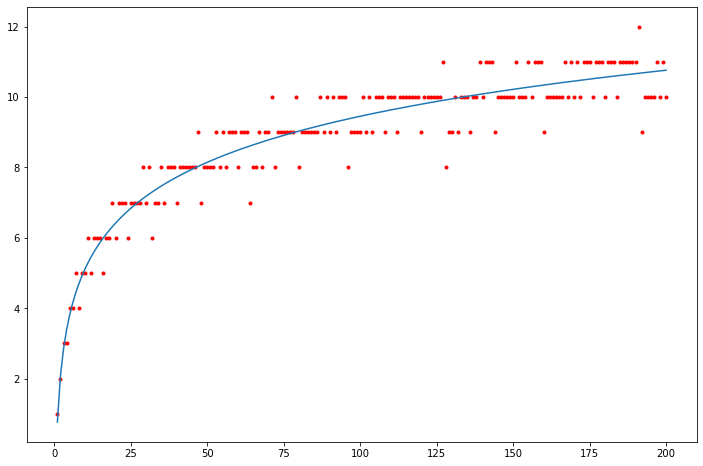

In [24]:
import pylab as plt

ln = []
for i in range(1, 201):
    chain = splittingVectorAlgorithm(i)
    ln.append(len(chain))
print(ln)

x = [i for i in range(1, 201)]

lnx = [math.log2(i) for i in range(1, 201)]
lnx2 = [math.log2(i) ** 2 for i in range(1, 201)]
lnx_y = [ln[i - 1] * lnx[i - 1] for i in range(1, 201)]

a = (201 * sum(lnx_y) - sum(ln) * sum(lnx)) / (201 * sum(lnx2) - sum(lnx) ** 2)
b = (sum(ln) - a * sum(lnx)) / 200

y = [b + a * lnx[i - 1] for i in range(1, 201)]

plt.figure(figsize = (12, 8))
plt.scatter(x, ln, color='r', marker='.')
plt.plot(x, y)
plt.show()


По графику можно сделать вывод, что $l(n)$ аппроксимируется логарифмом, что подтверждает первое следствие из теоремы Бауэра.

*5) Проверка гипотезы Шольца–Брауэра*

In [ ]:
for n in range(2, 11):
    v1 = len(splittingVectorAlgorithm(2**n - 1))
    v2 = len(splittingVectorAlgorithm(n)) + n - 1
    print("n =", n, "l(2^n - 1) =", v1, "l(n) + n - 1 =", v2)

n = 2 l(2^n - 1) = 3 l(n) + n - 1 = 3
n = 3 l(2^n - 1) = 5 l(n) + n - 1 = 5
n = 4 l(2^n - 1) = 6 l(n) + n - 1 = 6
n = 5 l(2^n - 1) = 8 l(n) + n - 1 = 8
n = 6 l(2^n - 1) = 9 l(n) + n - 1 = 9
n = 7 l(2^n - 1) = 11 l(n) + n - 1 = 11
n = 8 l(2^n - 1) = 11 l(n) + n - 1 = 11
n = 9 l(2^n - 1) = 13 l(n) + n - 1 = 13


Сведем результаты в таблицу:

| $n$ | $l(2^n-1)$ | $l(n)+n-1$ |
| :-: | :-: | :-: |
| 2 | 3 | 3 |
| 3 | 5 | 5 |
| 4 | 6 | 6 |
| 5 | 8 | 8 |
| 6 | 9 | 9 |
| 7 | 11 | 11 |
| 8 | 11 | 11 |
| 9 | 13 | 13 |
| 10 | 14 | 14 |

Как можно увидеть, для $2 \leq n \leq 10$ гипотеза выполняется. Стоит отметить, что значения совпали, т.е при $2 \leq n \leq 10$ для посчета $l(2^n-1)$ можно использовать формулу $l(n)+n-1$, что очень сильно может сэкономить время.

## Вывод

Во время выполнения работы были изучены различные методы возведения в степень числа наиболее быстрыми методами. Было изучено понятие аддитивных цепочек и были реализованы различные алгоритмы построения аддитивных цепочек (алгоритмы Бауэра и ДВИ). Были сделаны вывод по поводу того, что ДВИ работает намного медленне, нежели алгоритм Бауэра, но выдает наименьшую длину цепочки. Также были проверены первое следствие теоремы Бауэра и гипотеза Шольца-Бауэра.